## Практична робота 1

### Завдання 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./excel/spotify-2023.csv", encoding='cp1251')

print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

In [3]:
#Розмір датасету
num_rows, num_columns = data.shape

print("\n Розмір датасету: {} рядків і {} стовпців".format(num_rows, num_columns))


 Розмір датасету: 953 рядків і 24 стовпців


In [4]:
#Кількість пропусків в кожному стовпці
missing_values = data.isnull().sum()

print("Кількість пропусків в стовпцях:")
print(missing_values)

Кількість пропусків в стовпцях:
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [5]:
#Тип стовпців
print("Тип стовпців:")
data.dtypes

Тип стовпців:


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову
діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у
2023 році за кількістю прослуховувань.

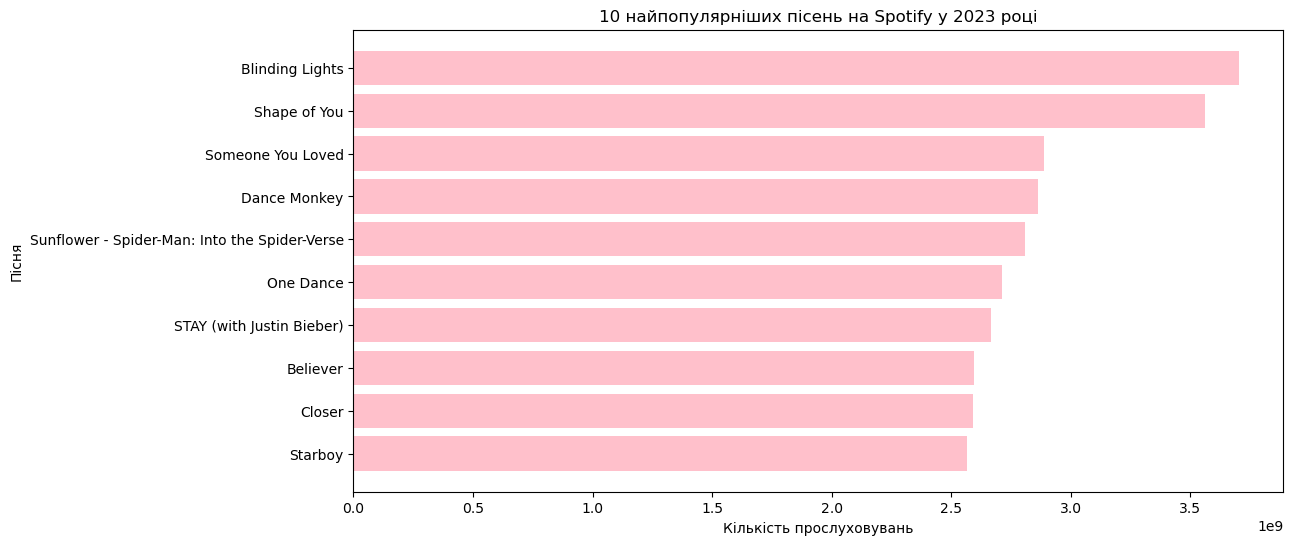

In [6]:
data.loc[:, 'streams'] = pd.to_numeric(data['streams'], errors='coerce')
top_songs = data[['track_name','streams']].sort_values(by = 'streams', ascending= False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_songs["track_name"], top_songs["streams"], color='pink')
plt.xlabel("Кількість прослуховувань")
plt.ylabel("Пісня")
plt.title("10 найпопулярніших пісень на Spotify у 2023 році")
plt.gca().invert_yaxis()
plt.show()

Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або
секторну діаграму, яка відображає розподіл жанрів серед
найпопулярніших пісень у 2023 році.

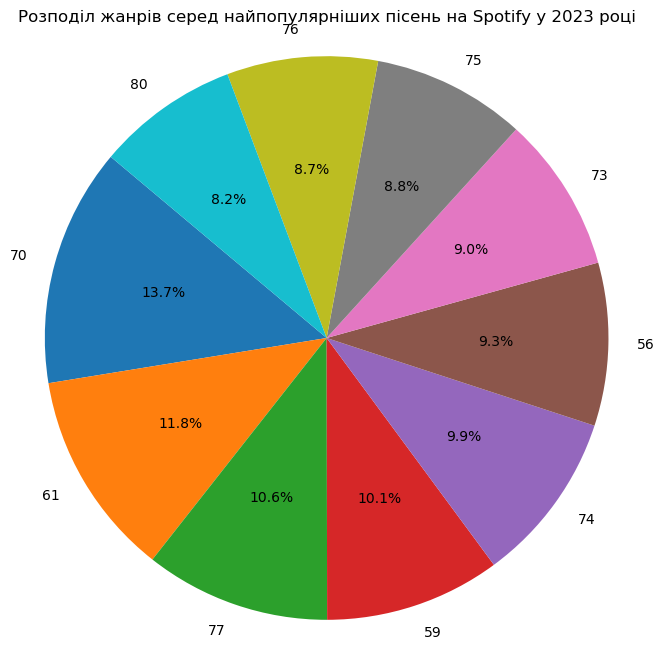

In [7]:
data['streams'] = data['streams'].astype(float)
genre_distribution = data.groupby('danceability_%')['streams'].sum().nlargest(10)
plt.figure(figsize=(8, 8))

plt.pie(genre_distribution, labels=genre_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл жанрів серед найпопулярніших пісень на Spotify у 2023 році')
plt.axis('equal')
plt.show()

Динаміка популярності треку в залежності від часу: Побудуйте лінійний
графік, який відображає зміни кількості прослуховувань певного треку
протягом року 2023 року.

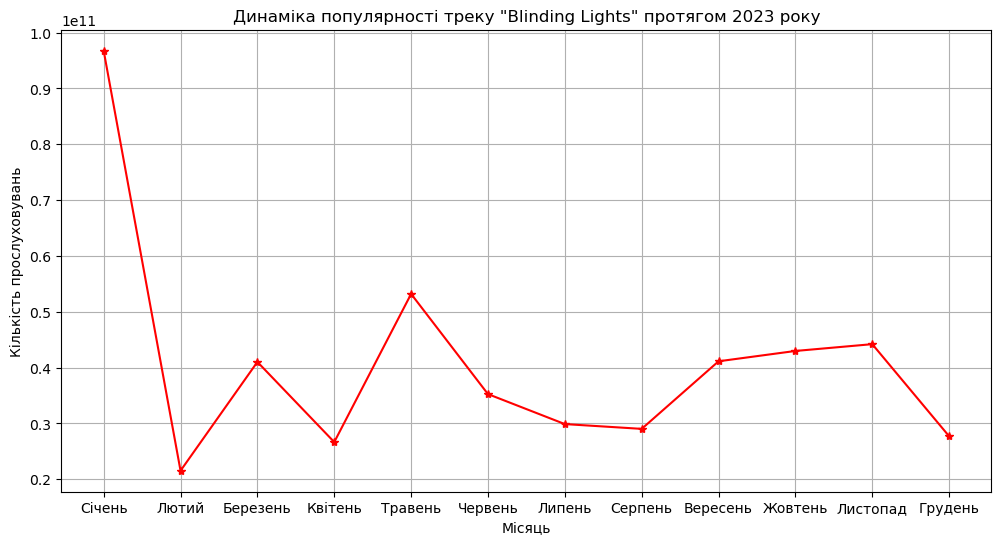

In [11]:
popular_track = data.loc[data['streams'].idxmax(), 'track_name']
monthly_streams = data.groupby('released_month')['streams'].sum()
month_labels = ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень']

plt.figure(figsize=(12, 6))
plt.plot(monthly_streams.index-1, monthly_streams.values, marker='*', color='red')
plt.title(f'Динаміка популярності треку "{popular_track}" протягом 2023 року')
plt.xlabel('Місяць')
plt.ylabel('Кількість прослуховувань')
tick_positions = range(len(month_labels))
plt.xticks(tick_positions, month_labels)
plt.grid()
plt.show()

Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій
відображаються 10 найпопулярніших артистів на Spotify у 2023 році за
кількістю слухачів.

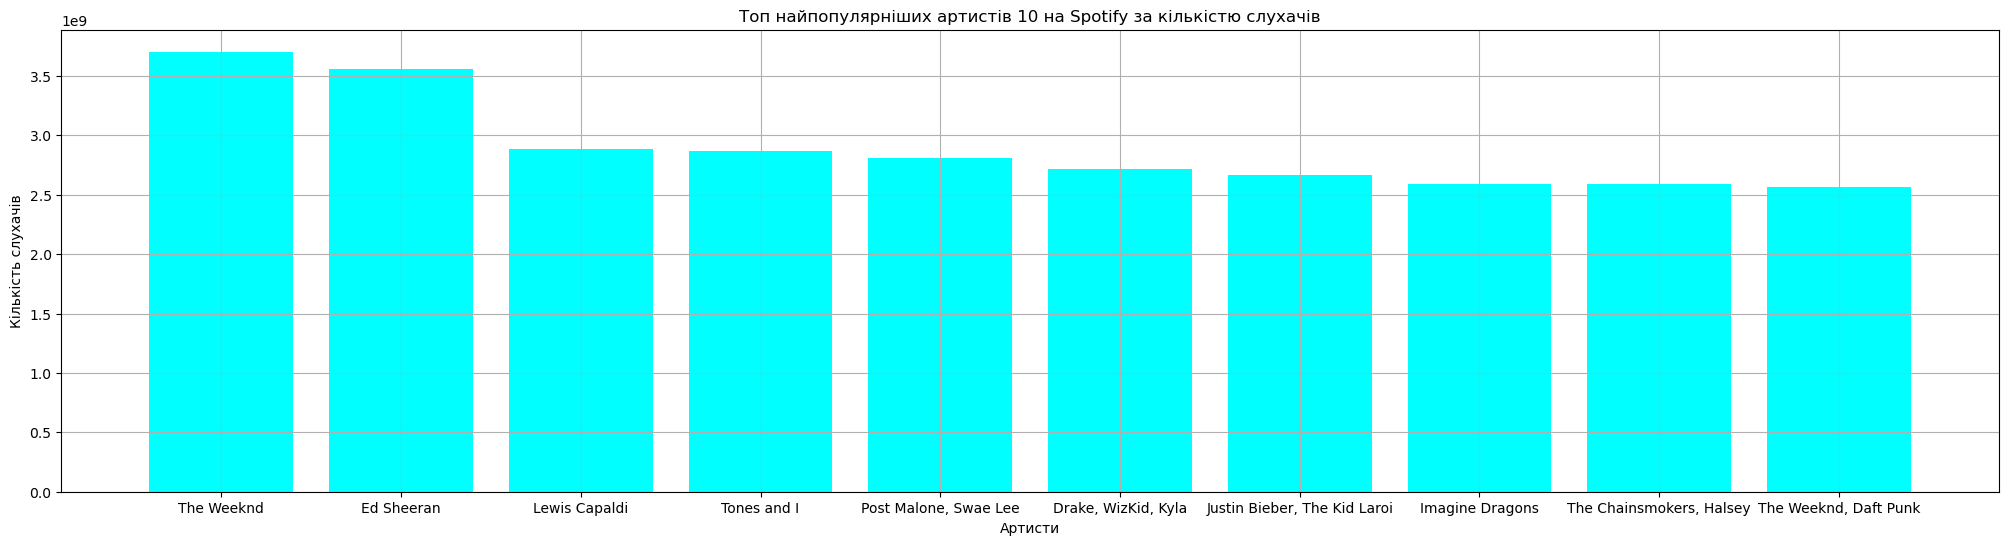

In [23]:
data.loc[:, 'streams'] = pd.to_numeric(data['streams'], errors='coerce')
top_artists = data[['artist(s)_name','streams']].sort_values(by = 'streams', ascending= False).head(10)

plt.figure(figsize=(25, 6))
plt.bar(top_artists['artist(s)_name'], top_artists['streams'], color='cyan')
plt.xlabel('Артисти')
plt.ylabel('Кількість слухачів')
plt.title('Топ найпопулярніших артистів 10 на Sрotify за кількістю слухачів')
plt.grid()
plt.show()

Порівняння популярності трьох треків: Побудуйте горизонтальну
стовпчикову діаграму, яка порівнює кількість прослуховувань трьох
конкретних треків у 2023 році.

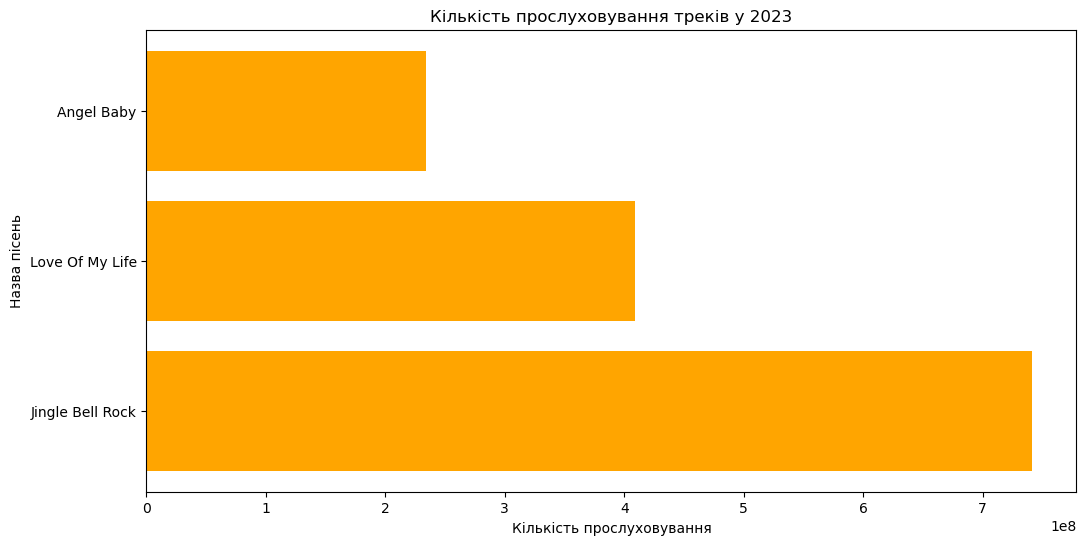

In [32]:
selected_songs = ["Jingle Bell Rock", "Love Of My Life", "Angel Baby"]
tracks_data = data[data['track_name'].isin(selected_songs)]

plt.figure(figsize=(12, 6))
plt.barh(tracks_data['track_name'], tracks_data['streams'], color='orange')
plt.yticks(range(len(tracks_data['track_name'])), selected_songs)
plt.xlabel('Кількість прослуховування')
plt.ylabel('Назва пісень')
plt.title('Кількість прослуховування треків у 2023')
plt.show()

Виконуючи цю практичну роботу, ми ознайомилися зі структурою та характеристиками даних про найпопулярніші пісні на Spotify у 2023 році. Ми дослідили кількість прослуховувань та розподіл danceability серед найпопулярніших треків, а також прослідкували динаміку популярності протягом року. Висновки допомогли зрозуміти музичні тенденції та уподобання слухачів. 